In [1]:
from unicore.data import (
    LMDBDataset,
)
# db_path="/data/prot_frag/train_ligand_pocket/train.small.lmdb"
db_path="/data/pdbbind_2020/pdb_2020_clean.lmdb"
dataset=LMDBDataset(db_path)

In [19]:
print(len(dataset))

1093903


In [ ]:
# sort by "data[i]['top_k_pockets'][0]"

很高 98 以上
1j14
6msn
6csr

93 左右
4qh7
1ppk
4fai
3ce0
5vdo
4qjp

86
6g97
5qc4
3v01

In [3]:
class QueryReader():
    def __init__(self,query_dir):
        self.query_dir=query_dir
        self.query_ebds,self.query_names = self._load_querys()
        self.name2ebd={name:ebd for name,ebd in zip(self.query_names,self.query_ebds)}

    def _load_querys(self):
        data=torch.load(self.query_dir)
        query_ebds=[]
        names=[]
        for item in data:
            query_ebds.append(item['pocket_ebd'])
            names.append(item['pocket_name'])
        return list(torch.stack(query_ebds).to("cuda:1")),names

    def __len__(self):
        return len(self.query_ebds)
    
    def __getitem__(self,idx):
        return self.query_ebds[idx],self.query_names[idx]

    def get_ebd(self,name):
        return self.name2ebd[name]
    
query_reader=QueryReader("/data/rag/pdbbind_ebds.pt")

In [10]:
a=query_reader.get_ebd("6csr")
b=query_reader.get_ebd("6msn")
# dot product
print(torch.matmul(a,b.T))

tensor(0.9131, device='cuda:1')


/tmp/ipykernel_258564/1892210534.py:4: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1702400412039/work/aten/src/ATen/native/TensorShape.cpp:3614.)
  print(torch.matmul(a,b.T))


In [1]:
import wandb
import torch
import numpy as np
import pandas as pd
data=torch.load("/data/rag/pdbbind_ebds.pt")
df = pd.DataFrame(data)

In [2]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter(log_dir="/project/runs")
pocket_ebd=df["pocket_ebd"].to_numpy()
pocket_ebd=np.vstack(pocket_ebd)
mol_ebd=df["mol_ebd"].to_numpy()
mol_ebd=np.vstack(mol_ebd)

writer.add_embedding(pocket_ebd,metadata=df["pocket_name"].tolist(),tag="pocket_ebd")
writer.add_embedding(mol_ebd,metadata=df["pocket_name"].tolist(),tag="mol_ebd")


In [2]:
import wandb
import torch
import numpy as np
import pandas as pd
data=torch.load("/drug/rag/pdbbind_ebds.pt")

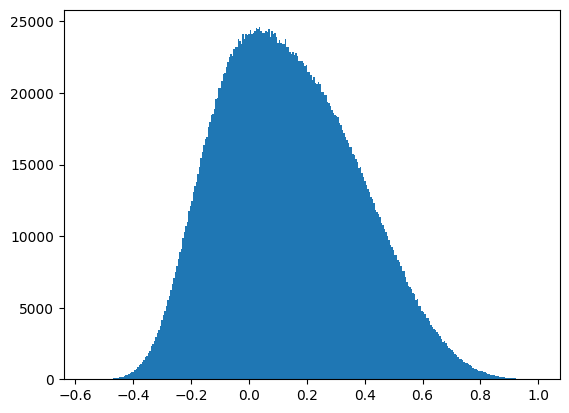

In [15]:
# sample a pair in data
import random
import matplotlib.pyplot as plt
sample_num=3000000
scores=[]
for i in range(sample_num):
    pair=random.sample(data,2)
    a=pair[0]["pocket_ebd"]
    b=pair[1]["pocket_ebd"]
    dot=torch.matmul(a,b.T)
    scores.append(dot.item())

plt.hist(scores,bins=300)
plt.show()

In [27]:
# Create pairs.txt for dud-e and BioLip
import sys 
import os
sys.path.append("/project")
from scripts.benchmark.dataset import PDBBindDataset, DUDEDataset ,BioLipDataset
from tqdm import tqdm
BioLip_dataset=BioLipDataset()
dude_dataset=DUDEDataset()

output=""
cnt=0
print(dude_dataset.get_items())
for item1 in tqdm(dude_dataset.get_items()):
    pocket_a=item1["name"]+".pdb"
    for item2 in BioLip_dataset.get_items():
        pocket_b=item2["name"]+".pdb"
        output+=pocket_a+"\t"+pocket_b+"\n"
        cnt+=1

# dist="/drug/rag/FLAPP/pockets"
# for item1 in tqdm(dude_dataset):
#     s_file=item1["pocket6A_dir"]
#     t_file=os.path.join(dist,item1["name"]+".pdb")
#     os.system("cp {} {}".format(s_file,t_file))
# for item2 in tqdm(BioLip_dataset):
#     s_file=item2["pocket6A_dir"]
#     t_file=os.path.join(dist,item2["name"]+".pdb")
#     os.system("cp {} {}".format(s_file,t_file))

print("total:",cnt)
with open("/drug/rag/FLAPP/dude_BioLip_pairs.txt","w") as f:
    f.write(output)
    


/drug/DUD-E/raw/*
[{'name': 'hivpr', 'dir': '/drug/DUD-E/raw/hivpr', 'pocket6A_dir': '/drug/DUD-E/raw/hivpr/pocket6A.pdb', 'pocket10A_dir': '/drug/DUD-E/raw/hivpr/pocket10A.pdb', 'ligand_dir': '/drug/DUD-E/raw/hivpr/crystal_ligand.mol2', 'protein_dir': '/drug/DUD-E/raw/hivpr/receptor.pdb'}, {'name': 'akt2', 'dir': '/drug/DUD-E/raw/akt2', 'pocket6A_dir': '/drug/DUD-E/raw/akt2/pocket6A.pdb', 'pocket10A_dir': '/drug/DUD-E/raw/akt2/pocket10A.pdb', 'ligand_dir': '/drug/DUD-E/raw/akt2/crystal_ligand.mol2', 'protein_dir': '/drug/DUD-E/raw/akt2/receptor.pdb'}, {'name': 'abl1', 'dir': '/drug/DUD-E/raw/abl1', 'pocket6A_dir': '/drug/DUD-E/raw/abl1/pocket6A.pdb', 'pocket10A_dir': '/drug/DUD-E/raw/abl1/pocket10A.pdb', 'ligand_dir': '/drug/DUD-E/raw/abl1/crystal_ligand.mol2', 'protein_dir': '/drug/DUD-E/raw/abl1/receptor.pdb'}, {'name': 'pparg', 'dir': '/drug/DUD-E/raw/pparg', 'pocket6A_dir': '/drug/DUD-E/raw/pparg/pocket6A.pdb', 'pocket10A_dir': '/drug/DUD-E/raw/pparg/pocket10A.pdb', 'ligand_dir': 

100%|██████████| 101/101 [00:06<00:00, 15.24it/s]


total: 5584896


# check the sizes of all the 6A pockets
prevent RNA,DNAs

In [24]:
import sys 
import os
sys.path.append("/project")
from scripts.benchmark.dataset import PDBBindDataset, DUDEDataset ,BioLipDataset
from tqdm import tqdm
import Bio.PDB

BioLip_dataset=BioLipDataset()

remove_list=[]
def get_atom_cnt(pdb_dir):
    parser = Bio.PDB.PDBParser()
    structure = parser.get_structure("R", pdb_dir)
    if len(structure) == 0 :
        remove_list.append(pdb_dir)
        return 0
    model = structure[0]
    atom_cnt=0
    for chain in model:
        for residue in chain:
            for atom in residue:
                atom_cnt+=1
    if atom_cnt<100:
        remove_list.append(pdb_dir)
    return atom_cnt

tasks=[]
for item in BioLip_dataset:
    tasks.append(item["pocket6A_dir"])

results=[]
for i in tqdm(tasks):
    results.append(get_atom_cnt(i))

100%|██████████| 58954/58954 [02:25<00:00, 406.18it/s]


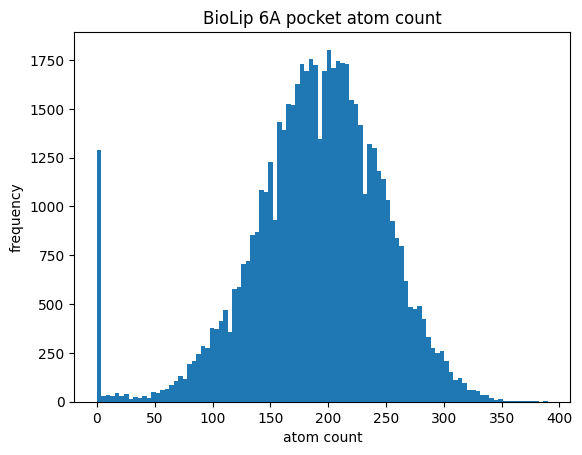

In [10]:
# plot results
import matplotlib.pyplot as plt
plt.hist(results,bins=100)
plt.xlabel("atom count")
plt.ylabel("frequency")
plt.title("BioLip 6A pocket atom count")
plt.show()


In [21]:
num_gt_100=0
for i in results:
    if i ==0:
        num_gt_100+=1
print(num_gt_100)
print(len(results)-num_gt_100)

1287
57667


In [26]:
print(len(remove_list))
import shutil
for item in tqdm(remove_list):
    dir=os.path.dirname(item)
    shutil.rmtree(dir)

3658


100%|██████████| 3658/3658 [00:00<00:00, 5467.79it/s]


# draw the dist of FLAPP scores

In [1]:
from tqdm import tqdm 

FLAPP_output_file="/data/rag/FLAPP/dude_BioLip_output.txt"
with open(FLAPP_output_file, 'r') as f:
    lines = f.readlines()

result_category={}
for line in tqdm(lines[1:]):
    result_line=line.strip().split("\t")
    scores=result_line[2].split(" ")
    matching_score=max(float(scores[3]),float(scores[4]))
    source = result_line[0].strip()
    if source not in result_category:
        result_category[source]=[]
    result_category[source].append(matching_score)


100%|██████████| 5584896/5584896 [00:09<00:00, 610128.44it/s]


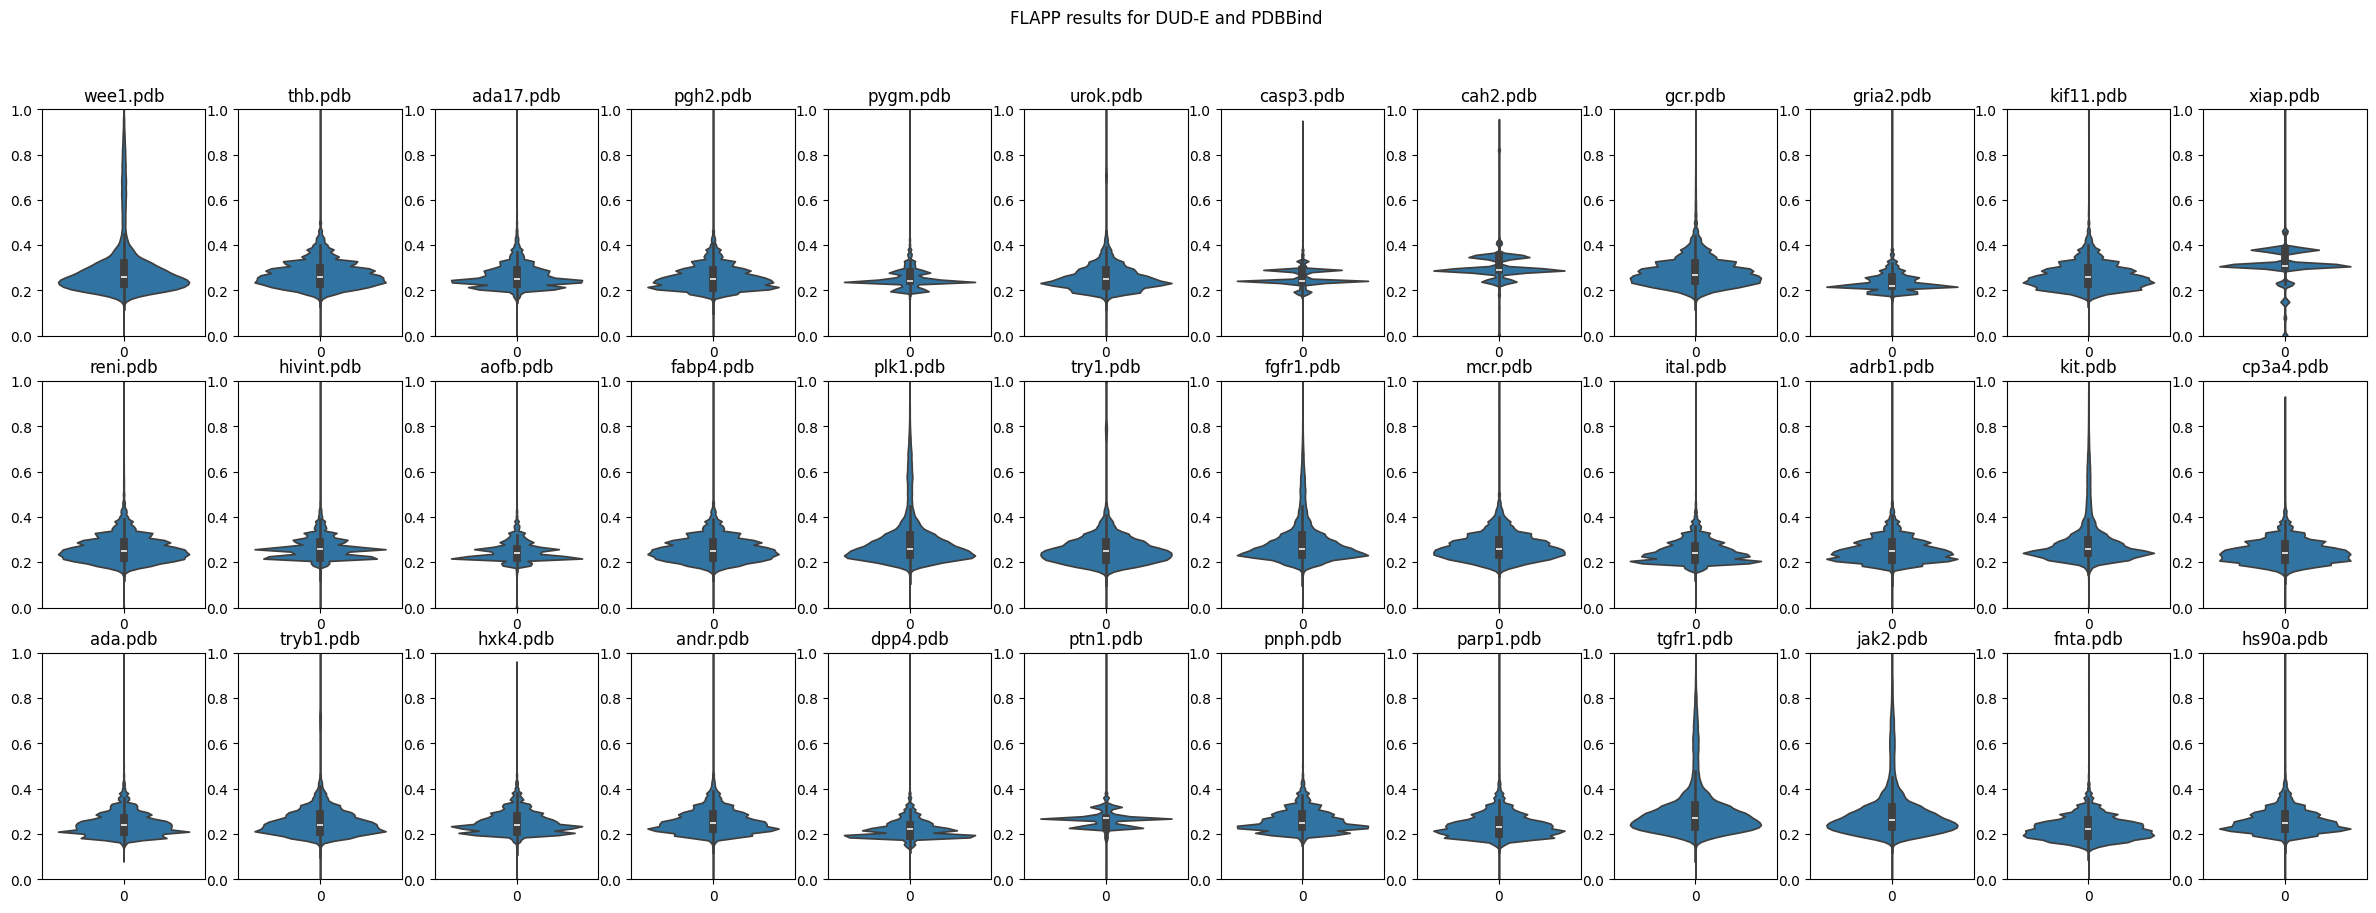

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

N=3
M=12

# draw a N*M grid and sample from result_category
# use violinplot from seaborn

show_list=random.sample(list(result_category.keys()),N*M)
fig, axs = plt.subplots(N, M, figsize=(30, 10))
fig.suptitle('FLAPP results for DUD-E and PDBBind')
for i in range(N):
    for j in range(M):
        data=result_category[show_list[i*M+j]]
        # y range from 0 to 1
        sns.violinplot(data=[data],ax=axs[i,j])
        axs[i,j].set_ylim(0,1)
        axs[i,j].set_title(show_list[i*M+j])
plt.show()

# draw the number of removed proteins with different FLAPP thresholds

In [5]:
from tqdm import tqdm 

FLAPP_output_file="/data/rag/FLAPP/dude_BioLip_output.txt"
with open(FLAPP_output_file, 'r') as f:
    lines = f.readlines()

FLAPP_result=[]
PDBBind_all_ids=[]
for line in tqdm(lines[1:]):
    result_line=line.strip().split("\t")
    scores=result_line[2].split(" ")
    matching_score=max(float(scores[3]),float(scores[4]))
    source = result_line[0].strip()
    target = result_line[1].strip()
    FLAPP_result.append((source,target,matching_score))
    PDBBind_all_ids.append(target)

PDBBind_all_ids = set(PDBBind_all_ids)
print("all valid PDBBind ids:",len(PDBBind_all_ids))


thresholds=[i/20 for i in range(20)]
results=[]

for threshold in thresholds:
    remove_list=[]
    for item in FLAPP_result:
        if item[2]>=threshold:
            remove_list.append(item[1])
    results.append(len(PDBBind_all_ids)-len(set(remove_list)))

for threshold in thresholds:
    print (threshold,results[int(threshold*20)])



100%|██████████| 5584896/5584896 [00:11<00:00, 486638.28it/s]


all valid PDBBind ids: 55296
0.0 0
0.05 0
0.1 0
0.15 0
0.2 0
0.25 1
0.3 225
0.35 9166
0.4 29832
0.45 36322
0.5 39582
0.55 41735
0.6 42926
0.65 44012
0.7 45238
0.75 46658
0.8 48304
0.85 50245
0.9 51983
0.95 53241


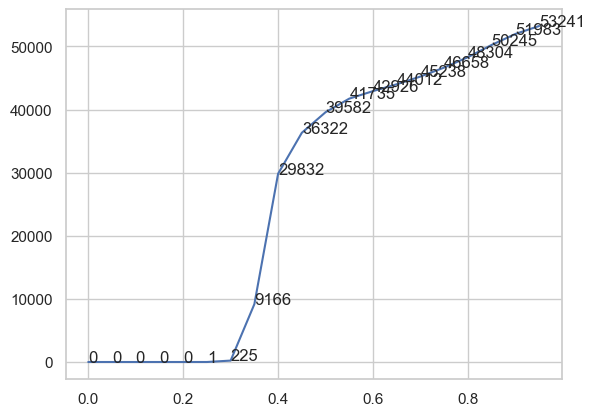

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the data
sns.lineplot(x=thresholds, y=results, ax=ax)

# Annotate the points
for i in range(len(thresholds)):
    ax.text(thresholds[i], results[i], str(results[i]))

# Show the plot
plt.show()

# draw the number of removed proteins with different BLAST thresholds

In [13]:
from numpy import linspace


blast_result_file = "/drug/rag/blast_result.txt"
blast_results=[]
blast_score_map={}
with open(blast_result_file, 'r') as f:
    lines = f.readlines()
    for line in lines : 
        line=line.strip().split("\t")
        source=line[0].split("_")[0]+".pdb"
        target=line[1].split("_")[0]+"_pocket.pdb"
        score=float(line[2])/100
        if (source,target) not in blast_score_map:
            blast_score_map[(source,target)]=score
        else:
            blast_score_map[(source,target)]=max(score,blast_score_map[(source,target)])

for k,v in blast_score_map.items():
    blast_results.append((k[0],k[1],v))

thresholds=linspace(0,1,100)
remain_number=[]
for threshold in thresholds:
    remove_list=[]
    for item in blast_results:
        if item[2]>=threshold:
            remove_list.append(item[1])
    remain_number.append(19443-len(set(remove_list)))

print(remain_number)

[11285, 11285, 11285, 11285, 11285, 11285, 11285, 11285, 11285, 11285, 11285, 11285, 11285, 11285, 11285, 11285, 11285, 11285, 11285, 11285, 11286, 11288, 11290, 11317, 11343, 11396, 11419, 11513, 11721, 11804, 11898, 12061, 12227, 12463, 12656, 12853, 13001, 13134, 13216, 13331, 13423, 13551, 13705, 13783, 13970, 14120, 14163, 14186, 14215, 14262, 14293, 14359, 14381, 14416, 14445, 14462, 14482, 14514, 14543, 14634, 14694, 14716, 14761, 14773, 14779, 14802, 14803, 14808, 14809, 14822, 14833, 14851, 14869, 14883, 14883, 14890, 14901, 14904, 14908, 14918, 14924, 14936, 14955, 14960, 14984, 14998, 15009, 15023, 15039, 15065, 15116, 15171, 15237, 15399, 15636, 15868, 16128, 16563, 17084, 17835]


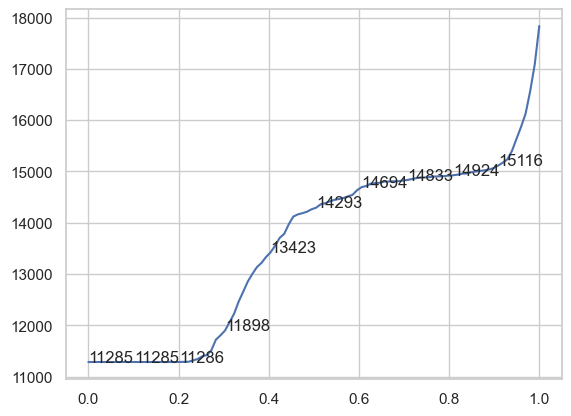

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the data
sns.lineplot(x=thresholds, y=remain_number, ax=ax)

# Annotate the points for some thresholds
for i in range(0,100,10):
    ax.text(thresholds[i], remain_number[i], str(remain_number[i]))

# Show the plot
plt.show()

# Draw about Morgan

In [17]:
from numpy import linspace
from scripts.benchmark.dataset import BioLipDataset

result_file = "/data/rag/morgan_dude_BioLip_result.txt"
with open(result_file, 'r') as f:
    lines = f.readlines()
BioLip_dataset=BioLipDataset()

thresholds=linspace(0,1,100)
remain_number=[]
for threshold in thresholds:
    remove_list=[]
    for item in tqdm(lines):
        item=item.strip().split("\t")
        if float(item[2])>=threshold:
            remove_list.append(item[1])
    remain_number.append(len(BioLip_dataset.get_name_list())-len(set(remove_list)))

print(remain_number)

100%|██████████| 5568938/5568938 [00:04<00:00, 1175259.71it/s]

[0, 0, 0, 0, 0, 0, 5, 13, 80, 170, 445, 1579, 4704, 15818, 31604, 37947, 43679, 47532, 49839, 51606, 52392, 53158, 53793, 54048, 54244, 54379, 54658, 54751, 54832, 54850, 54883, 54920, 54922, 54927, 54932, 54943, 54968, 54981, 54984, 55036, 55038, 55083, 55084, 55085, 55085, 55085, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138, 55138]


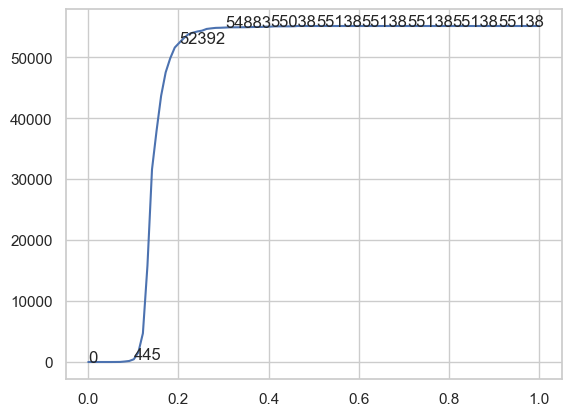

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the data
sns.lineplot(x=thresholds, y=remain_number, ax=ax)

# Annotate the points for some thresholds
for i in range(0,100,10):
    ax.text(thresholds[i], remain_number[i], str(remain_number[i]))

# Show the plot
plt.show()

# Draw about SeqSimilarity

In [2]:
from numpy import linspace
from tqdm import tqdm
from scripts.benchmark.dataset import BioLipDataset

result_file = "/data/rag/SeqSimilarity_result.txt"
with open(result_file, 'r') as f:
    lines = f.readlines()
BioLip_dataset=BioLipDataset()

thresholds=linspace(0,1,100)
remain_number=[]
for threshold in thresholds:
    remove_list=[]
    for item in tqdm(lines):
        item=item.strip().split("\t")
        if float(item[2])>=threshold:
            remove_list.append(item[1])
    remain_number.append(len(BioLip_dataset.get_name_list())-len(set(remove_list)))

print(remain_number)

100%|██████████| 5349061/5349061 [00:04<00:00, 1136060.82it/s]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23, 31, 68, 130, 134, 153, 168, 171, 179, 186, 196, 202, 213, 235, 245, 258, 287, 345, 411, 452, 504, 583, 691, 875, 1153, 1692, 2713, 4482, 9040, 17087, 26289, 33068, 36784, 38230, 39076, 39432, 39727, 40144, 40853, 41573, 41960, 42297, 42595, 42912, 43159, 43353, 43627, 43786, 44024, 44190, 44290, 44394, 44534, 44640, 44715, 44777, 44862, 44929, 45027, 45097, 45126, 45205, 45311, 45353, 45441, 45503, 45557, 45604, 45631, 45685, 45730, 45759, 45792, 45852, 45909, 45991, 46115, 46320, 46474, 46779, 47070, 47276, 47531, 47815, 48406, 48891, 49386, 49914, 50533, 51948]


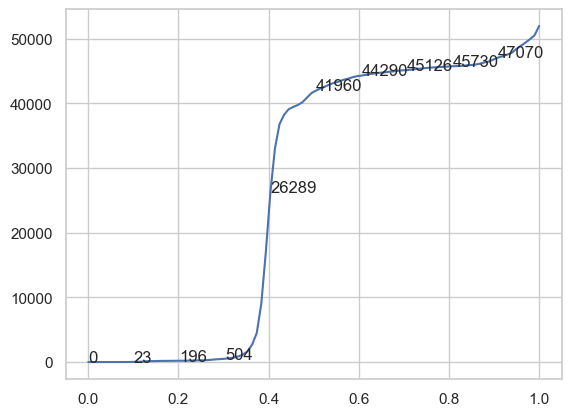

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the data
sns.lineplot(x=thresholds, y=remain_number, ax=ax)

# Annotate the points for some thresholds
for i in range(0,100,10):
    ax.text(thresholds[i], remain_number[i], str(remain_number[i]))

# Show the plot
plt.show()

# show the overlap of the removed sequence identity and flapp method

[('ampc.pdb', '1l2s_pocket.pdb', 1.0), ('ampc.pdb', '2rcx_pocket.pdb', 1.0), ('ampc.pdb', '2i72_pocket.pdb', 1.0), ('ampc.pdb', '6dpt_pocket.pdb', 1.0), ('ampc.pdb', '2hds_pocket.pdb', 1.0), ('ampc.pdb', '3gqz_pocket.pdb', 1.0), ('ampc.pdb', '3gv9_pocket.pdb', 1.0), ('ampc.pdb', '3o88_pocket.pdb', 1.0), ('ampc.pdb', '1my8_pocket.pdb', 1.0), ('ampc.pdb', '1ke3_pocket.pdb', 1.0)]
[('ampc.pdb', '4e3n_pocket.pdb', 1.0), ('ampc.pdb', '1iem_pocket.pdb', 1.0), ('ampc.pdb', '4jxw_pocket.pdb', 1.0), ('ampc.pdb', '4e3m_pocket.pdb', 1.0), ('ampc.pdb', '1ga9_pocket.pdb', 1.0), ('ampc.pdb', '3bm6_pocket.pdb', 1.0), ('ampc.pdb', '2r9w_pocket.pdb', 1.0), ('ampc.pdb', '4e3i_pocket.pdb', 1.0), ('ampc.pdb', '6dpx_pocket.pdb', 1.0), ('ampc.pdb', '4jxs_pocket.pdb', 1.0)]
threshold for blast to reach dataset size: 0.27941
dataset size: 11664
blast removing set size: 7779
FLAPP removing set size: 7779
overlap size: 6647


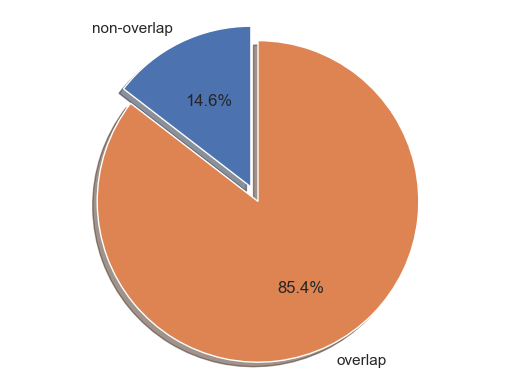

threshold for blast to reach dataset size: 0.35185
dataset size: 12830
blast removing set size: 6613
FLAPP removing set size: 6613
overlap size: 5369


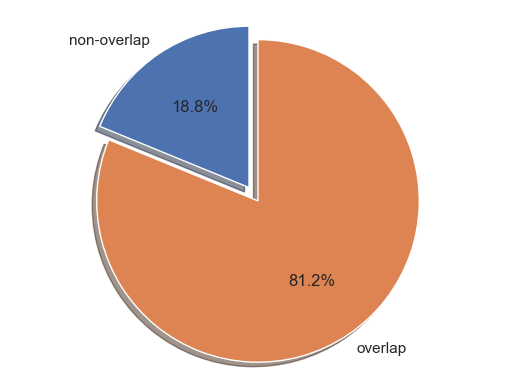

threshold for blast to reach dataset size: 0.9798
dataset size: 16569
blast removing set size: 2874
FLAPP removing set size: 2874
overlap size: 1701


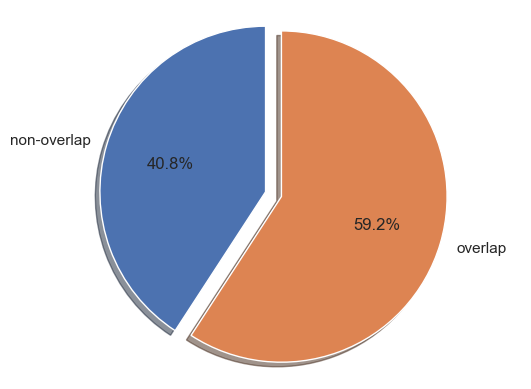

In [17]:
number_of_flapp_datasets=[11664,12830,16569]


from numpy import linspace
import seaborn as sns

# sort blast_results and FLAPP results
blast_results.sort(key=lambda x: x[2],reverse=True)
FLAPP_result.sort(key=lambda x: x[2],reverse=True)
print(blast_results[:10])
print(FLAPP_result[:10])

for dataset_size in number_of_flapp_datasets:
    removing_size=19443-dataset_size
    blast_removing_set=set()
    for item in blast_results:
        blast_removing_set.add(item[1])
        if len(blast_removing_set)==removing_size:
            print("threshold for blast to reach dataset size:",item[2])
            break
    FLAPP_removing_set=set()
    for item in FLAPP_result:
        FLAPP_removing_set.add(item[1])
        if len(FLAPP_removing_set)==removing_size:
            break
    
    print("dataset size:",dataset_size)
    print("blast removing set size:",len(blast_removing_set))
    print("FLAPP removing set size:",len(FLAPP_removing_set))
    print("overlap size:",len(blast_removing_set.intersection(FLAPP_removing_set)))
    overlap_size=len(blast_removing_set.intersection(FLAPP_removing_set))

    # draw a pie chart to show the overlap percentage
    labels = ['non-overlap','overlap']
    sizes = [removing_size-overlap_size,overlap_size]
    explode = (0, 0.1)  # only "explode" the 2nd slice
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

    

/tmp/ipykernel_2062317/1144936980.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Blast Results', 'FLAPP Results'])


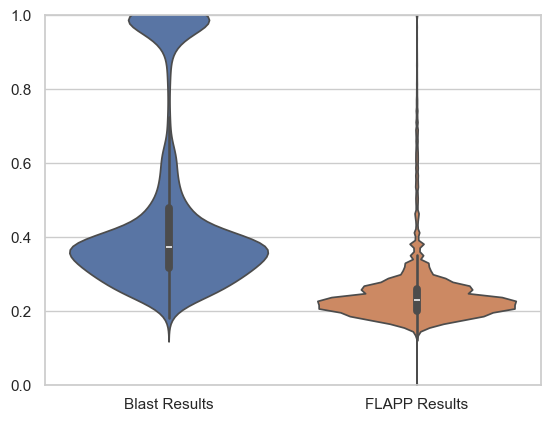

In [20]:
#draw the dist of FLAPP and BLAST scores using violin plot
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the data
sns.violinplot(data=[list(map(lambda x:x[2],blast_results)),list(map(lambda x:x[2],FLAPP_result))], ax=ax)
ax.set_xticklabels(['Blast Results', 'FLAPP Results'])
ax.set_ylim(0,1)
# Show the plot
plt.show()

# Try to use Biopython to calc pairwise identity

In [3]:
from Bio.Align import PairwiseAligner
from Bio.SeqIO import parse
from tqdm import tqdm

dude_fasta=list(parse("/drug/rag/DUD_E.fasta","fasta"))
pdbbind_fasta=list(parse("/drug/rag/PDBBind.fasta","fasta"))

aligner = PairwiseAligner()

# 计算 pairwise identity
results = []
for dude_seq in tqdm(dude_fasta[:1]):
    for pdbbind_seq in tqdm(pdbbind_fasta[:10]):
        alignment = aligner.align(dude_seq.seq, pdbbind_seq.seq)[0]
        print(alignment.score)
        print(dude_seq.seq)
        print(pdbbind_seq.seq)
        seq_len=min(len(dude_seq.seq),len(pdbbind_seq.seq))
        score=alignment.score/seq_len
        results.append((dude_seq.id,pdbbind_seq.id,score))
        print(score)

# 输出或保存结果
print(results)


100%|██████████| 1/1 [00:00<00:00, 70.48it/s]

104.0
APQQINDIVHRTITPLIEQQKIPGMAVAVIYQGKPYYFTWGYADIAKKQPVTQQTLFELGSVSKTFTGVLGGDAIARGEIKLSDPTTKYWPELTAKQWNGITLLHLATYTAGGLPLQVPDEVKSSSDLLRFYQNWQPAWAPGTQRLYANSSIGLFGALAVKPSGLSFEQAMQTRVFQPLKLNHTWINVPPAEEKNYAWGYREGKAVHVSPGALDAEAYGVKSTIEDMARWVQSNLKPLDINEKTLQQGIQLAQSRYWQTGDMYQGLGWEMLDWPVNPDSIINGSDNLAARPVKAITPPTPAVRASWVHKTGATGGFGSYVAFIPEKELGIVMLANKNYPNPARVDAAWQILNALQ
MKMKEFLDLLNESRLTVTLTGAGISTPSGIPDFNVFDIDFFYSHPEEFYRFAKEGIFPMLQAKPNLAHVLLAKLEEKGLIEAVITQNIDRLHQRAGSKKVIELHGNVEEYYCVRCEKKYTVEDVIKKLESSDVPLCDDCNSLIRPNIVFFGENLPQDALREAIGLSSRASLMIVLGSSLVVYPAAELPLITVRSGGKLVIVNLGETPFDDIATLKYNMDVVEFARRVMEEGGIS
0.4444444444444444
132.0
APQQINDIVHRTITPLIEQQKIPGMAVAVIYQGKPYYFTWGYADIAKKQPVTQQTLFELGSVSKTFTGVLGGDAIARGEIKLSDPTTKYWPELTAKQWNGITLLHLATYTAGGLPLQVPDEVKSSSDLLRFYQNWQPAWAPGTQRLYANSSIGLFGALAVKPSGLSFEQAMQTRVFQPLKLNHTWINVPPAEEKNYAWGYREGKAVHVSPGALDAEAYGVKSTIEDMARWVQSNLKPLDINEKTLQQGIQLAQSRYWQTGDMYQGLGWEMLDWPVNPDSIINGSDNLAARPVKAITPPTPAVRASWVHKTGATGGFGSYVAFIPEKELGIVMLANKNYPNPARVDAAWQILNALQ
RGSFVEMVDNLRGKSGQGYYVE

In [15]:
output_file =  "/drug/rag/pairwise_alignment_results.txt"
with open (output_file,"w") as f:
    for item in results:
        f.write(item[0]+"\t"+item[1]+"\t"+str(round(item[2],3))+"\n")


[('ampc_A', '2h2h_protein_A', 0.4444444444444444), ('ampc_A', '2qzl_protein_A', 0.37183098591549296), ('ampc_A', '1gjd_protein_B', 0.4326530612244898), ('ampc_A', '3tf6_protein_A', 0.5113636363636364), ('ampc_A', '4f0c_protein_A', 0.4780701754385965), ('ampc_A', '4f0c_protein_B', 0.4780701754385965), ('ampc_A', '5ndf_protein_A', 0.4056338028169014), ('ampc_A', '3t6b_protein_A', 0.5380281690140845), ('ampc_A', '4owo_protein_A', 0.3764367816091954), ('ampc_A', '4j81_protein_A', 0.38666666666666666)]


# draw the dist of biopython pairwise identity scores

In [18]:
from tqdm import tqdm 

pairwise_output_file="/drug/rag/pairwise_alignment_results.txt"
with open(pairwise_output_file, 'r') as f:
    lines = f.readlines()


result_category={}
pairwise_result=[]
for line in tqdm(lines[1:]):
    result_line=line.strip().split("\t")
    matching_score=float(result_line[2].strip())
    source = result_line[0].strip()
    target = result_line[1].strip()
    pairwise_result.append((source,target,matching_score))
    if source not in result_category:
        result_category[source]=[]
    result_category[source].append(matching_score)


100%|██████████| 4138028/4138028 [00:05<00:00, 787491.40it/s]


In [14]:
result_category["ampc_A"]

[0.372,
 0.433,
 0.511,
 0.478,
 0.478,
 0.406,
 0.538,
 0.376,
 0.387,
 0.389,
 0.429,
 0.36,
 0.583,
 0.517,
 0.44,
 0.438,
 0.506,
 0.55,
 0.417,
 0.39,
 0.433,
 0.448,
 0.462,
 0.497,
 0.451,
 0.396,
 0.367,
 0.466,
 0.389,
 0.352,
 0.391,
 0.432,
 0.456,
 0.634,
 0.621,
 0.54,
 0.556,
 0.553,
 0.375,
 0.458,
 0.486,
 0.486,
 0.459,
 0.393,
 0.403,
 0.403,
 0.38,
 0.438,
 0.422,
 0.462,
 0.427,
 0.457,
 0.444,
 0.473,
 0.363,
 0.363,
 0.363,
 0.527,
 0.406,
 0.434,
 0.415,
 0.451,
 0.44,
 0.48,
 0.456,
 0.439,
 0.392,
 0.406,
 0.557,
 0.557,
 0.508,
 0.508,
 0.451,
 0.538,
 0.531,
 0.39,
 0.366,
 0.409,
 0.568,
 0.456,
 0.506,
 0.411,
 0.542,
 0.539,
 0.539,
 0.403,
 0.55,
 0.684,
 0.364,
 0.463,
 0.472,
 0.442,
 0.442,
 0.474,
 0.474,
 0.406,
 0.406,
 0.369,
 0.363,
 0.477,
 0.455,
 0.438,
 0.44,
 0.383,
 0.383,
 0.383,
 0.383,
 0.452,
 0.383,
 0.556,
 0.387,
 0.387,
 0.426,
 0.445,
 0.352,
 0.663,
 0.663,
 0.373,
 0.373,
 0.358,
 0.406,
 0.503,
 0.397,
 0.397,
 0.5,
 0.462,
 0.43

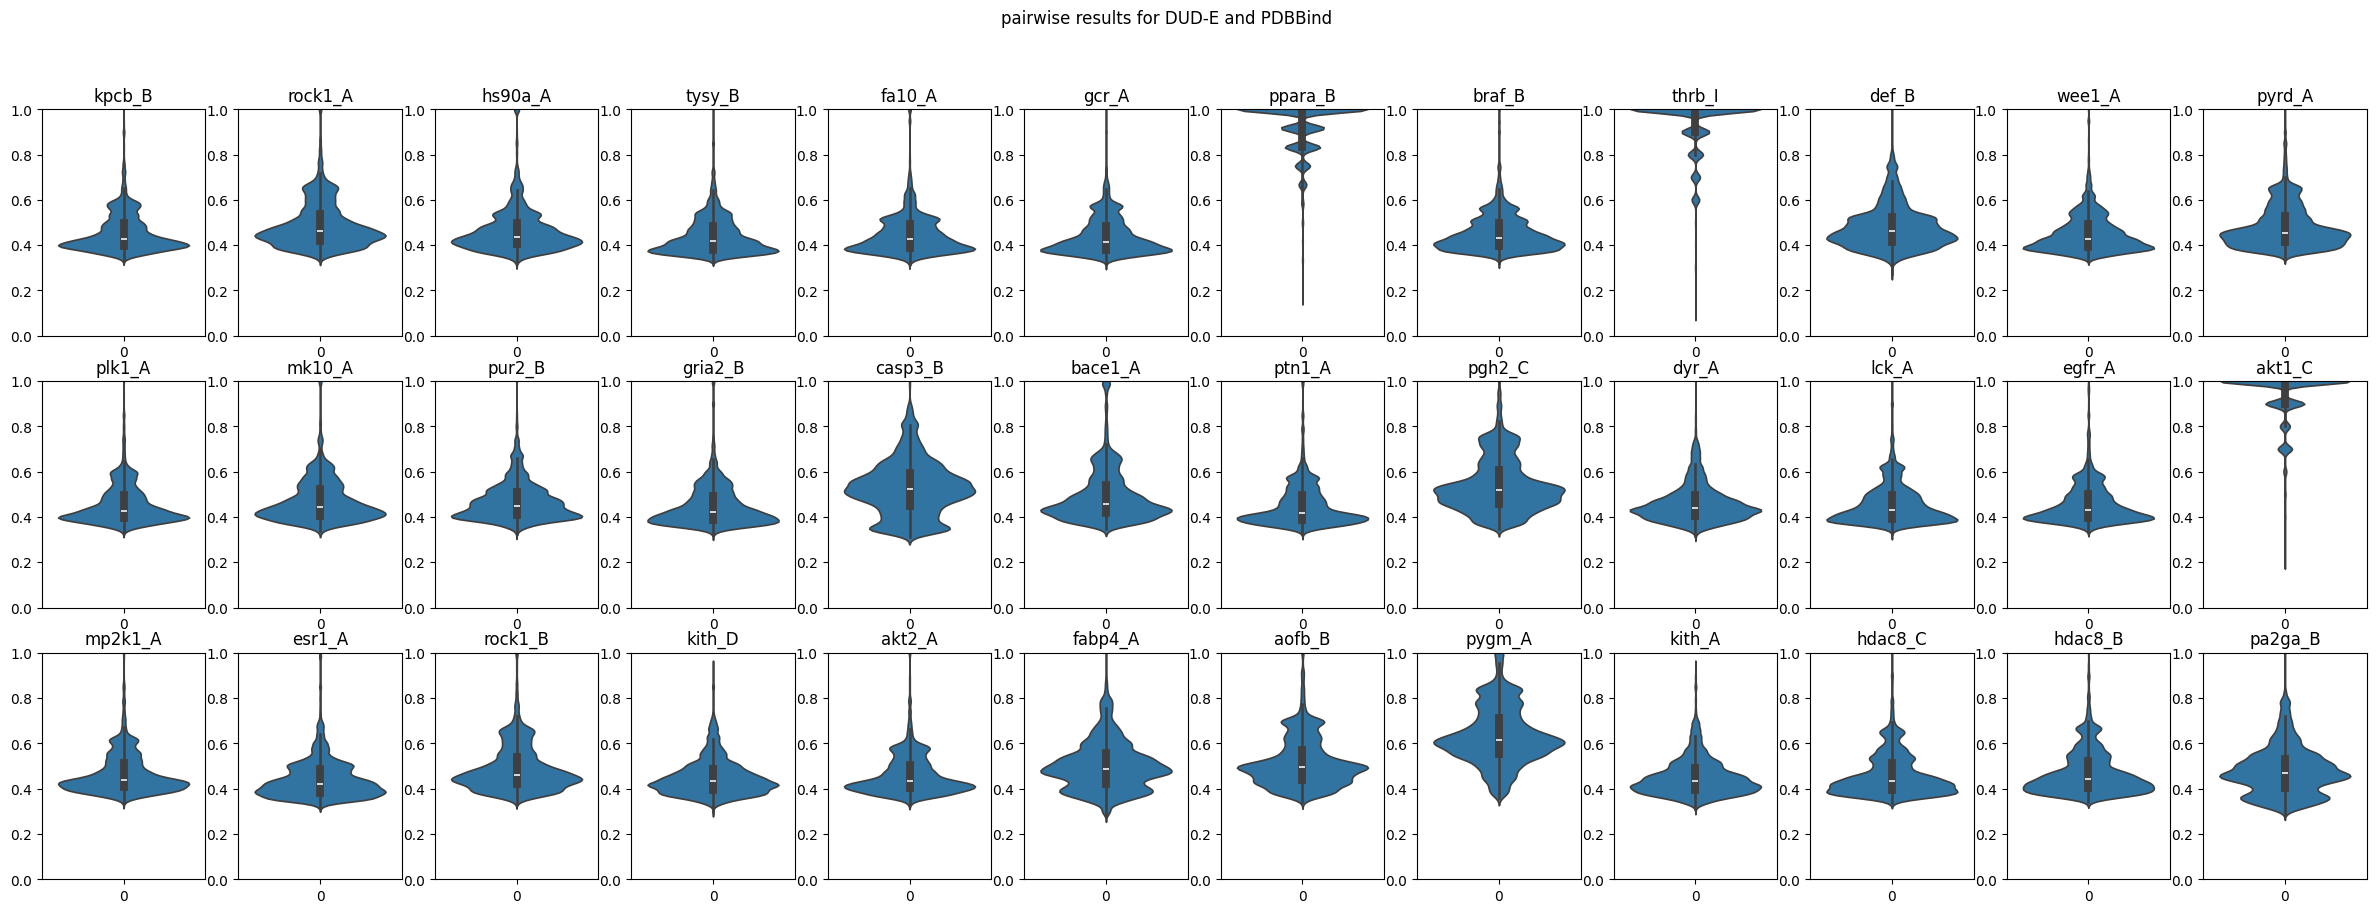

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

N=3
M=12

# draw a N*M grid and sample from result_category
# use violinplot from seaborn

show_list=random.sample(list(result_category.keys()),N*M)
fig, axs = plt.subplots(N, M, figsize=(30, 10))
fig.suptitle('pairwise results for DUD-E and PDBBind')
for i in range(N):
    for j in range(M):
        data=result_category[show_list[i*M+j]]
        # y range from 0 to 1
        sns.violinplot(data=[data],ax=axs[i,j])
        axs[i,j].set_ylim(0,1)
        axs[i,j].set_title(show_list[i*M+j])
plt.show()

In [25]:
# draw a scatter plot for pairwise and FLAPP

import numpy as np
import matplotlib.pyplot as plt
import seaborn

points=[]


pairwise_score_map={}
for item in pairwise_result:
    dude_id=item[0].split("_")[0]
    pdbbind_id=item[1].split("_")[0]
    if (dude_id,pdbbind_id) not in pairwise_score_map:
        pairwise_score_map[(dude_id,pdbbind_id)]=item[2]
    else:
        pairwise_score_map[(dude_id,pdbbind_id)]=max(pairwise_score_map[(dude_id,pdbbind_id)],item[2])


FLAPP_score_map={}
for item in FLAPP_result:
    dude_id=item[0].split(".")[0]
    pdbbind_id=item[1].split("_")[0]
    FLAPP_score_map[(dude_id,pdbbind_id)]=item[2]

print(len(pairwise_score_map), len(FLAPP_score_map))

for key in pairwise_score_map:
    if key in FLAPP_score_map:
        points.append((pairwise_score_map[key],FLAPP_score_map[key]))
    else:
        print("error")

1963339 1983186


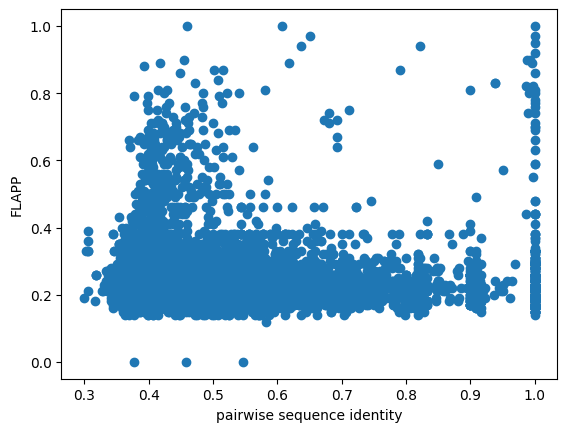

In [27]:
# sample 10000 points

import random

points_1w=random.sample(points,10000)

x = [item[0] for item in points_1w]
y = [item[1] for item in points_1w]

plt.scatter(x, y)
plt.xlabel("pairwise sequence identity")
plt.ylabel("FLAPP")
plt.show()

# generate index.pkl for targetdiff on pdbbind/BioLip

In [1]:
from scripts.benchmark.dataset import BioLipDataset

dataset=BioLipDataset()
index_output_path="/data/BioLip/targetdiff_utils/BioLip.pkl"

dataset.generate_targetdiff_index_pkl(index_output_path)


In [4]:
# read pkl
file="/data/rag/data_splits/BioLip-DUD_E_SeqSimilarity_30000.pkl"
import pickle
with open(file, 'rb') as f:
    data = pickle.load(f)
print(data["train"])

['6gjl', '5ou2', '5mpc', '6x5t', '6qqz', '6sy7', '7lwg', '4n1a', '4zfl', '5mns', '3oh3', '2msd', '6cpa', '2hi7', '4ab3', '4cyq', '3b6b', '1o49', '6ztq', '3qv8', '6duq', '6zgt', '6zkh', '4jpf', '7vct', '5xxw', '6q9n', '7pop', '5nun', '5fzh', '3ly6', '7dy2', '5jjf', '4bw3', '3n8s', '7b8t', '4dph', '4m9s', '2ezt', '6cf7', '5cnm', '2vvn', '3tlx', '2y2k', '7cjt', '7m20', '5rfi', '4izg', '1v1b', '5ebk', '5rae', '5dy2', '5ik2', '1ibv', '5ewm', '4azg', '6l3g', '2o0x', '4f0b', '3qxv', '5a89', '6r4t', '4azi', '2yfl', '6a3i', '6dhk', '2d5z', '5qpa', '6yc7', '7ety', '2pzi', '3c7i', '6bvi', '6n8t', '5ter', '5s62', '5il3', '6vfs', '6pf9', '2dxi', '4q46', '3spl', '4j06', '6zuv', '4h6b', '7ry1', '5lx3', '6uj4', '4r1l', '5afu', '6pt9', '7rl6', '4ab3', '5nbx', '7t0v', '6yvt', '6qm0', '4qcl', '3ngt', '4wq4', '5cte', '4xb4', '3tos', '6frz', '6qw9', '7kkc', '4pd4', '5e3d', '2c29', '3mb5', '5cqz', '1nkt', '6mv7', '3ihg', '3zhx', '7cqq', '7nov', '5l0k', '7agh', '6c6b', '3p2h', '5h9i', '5omr', '5rfa', '6su7',

# draw the score

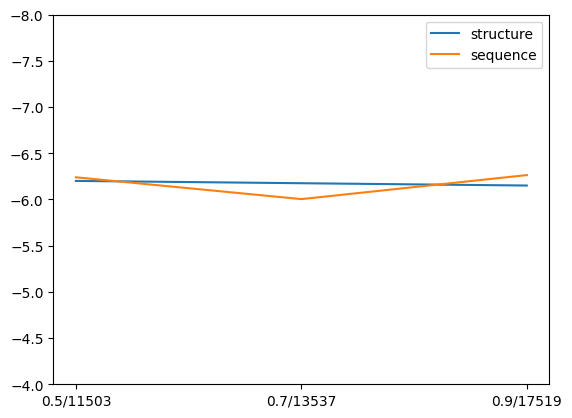

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x=["0.5/11503","0.7/13537","0.9/17519"]
y_structure=[-6.201,-6.176,-6.151]
y_sequence=[-6.240,-6.004,-6.264]

plt.plot(x,y_structure,label="structure")
plt.plot(x,y_sequence,label="sequence")
# y-axis from -3 to -7
plt.ylim(-4,-8)
plt.legend()
plt.show()

# preprocess the BioLip dataset for rag benchmark

In [1]:
import glob
import os
import Bio.PDB
from tqdm import tqdm
from multiprocessing import Pool

list_file="/drug/ssmopi/final_files.txt"
base_dir="/drug/BioLip/raw"

def get_ligand_pdb(input,output):
    '''
        get chain L from input and save it to output
    '''
    parser = Bio.PDB.PDBParser(QUIET=True)
    structure = parser.get_structure("protein", input)
    chain = structure[0]['L']
    io = Bio.PDB.PDBIO()
    io.set_structure(chain)
    io.save(output)

def get_pocket_pdb(input,output):
    '''
        get chain R from input and save it to output
    '''
    parser = Bio.PDB.PDBParser(QUIET=True)
    structure = parser.get_structure("protein", input)
    chain = structure[0]['R']
    io = Bio.PDB.PDBIO()
    io.set_structure(chain)
    io.save(output)

def process_task(task):
    task=task.strip()
    task_name=task.strip().split(".")[0]
    dir = os.path.join(base_dir,task_name)
    if not os.path.exists(dir):
        os.makedirs(dir)
    
    # cp pocket15A_lig
    s_file=os.path.join("/drug/ssmopi/pdbs_15a",task)
    t_file=os.path.join(dir,"pocket15A_lig.pdb")
    cmd="cp "+s_file+" "+t_file
    os.system(cmd)

    # get ligand.pdb
    get_ligand_pdb(t_file,os.path.join(dir,"ligand.pdb"))

    # get pocket15A.pdb
    get_pocket_pdb(t_file,os.path.join(dir,"pocket15A.pdb"))



with open(list_file,"r") as f:
    task_list=f.readlines()

# Create a multiprocessing Pool
pool = Pool(64)

# Use pool.map to process tasks in parallel
for _ in tqdm(pool.imap_unordered(process_task, task_list), total=len(task_list)):
    pass

# Close the pool and wait for all tasks to complete
pool.close()
pool.join()

100%|██████████| 58954/58954 [01:28<00:00, 665.92it/s]


# remove corrupted ligands in BioLip

In [11]:
from scripts.benchmark.dataset import BioLipDataset
from rdkit import Chem
import shutil
from tqdm import tqdm

remove_list=[]
for item in tqdm(BioLipDataset()):
    mol=Chem.MolFromPDBFile(item["ligand_dir"])
    if mol is None:
        remove_list.append(item)
print(len(remove_list))

# remove 
for item in remove_list:
    print(item['dir'])
    shutil.rmtree(item['dir'])


622it [00:00, 6219.03it/s][14:31:40] Explicit valence for atom # 0 B, 4, is greater than permitted
[14:31:40] Explicit valence for atom # 8 B, 4, is greater than permitted
1244it [00:00, 5888.64it/s][14:31:40] Explicit valence for atom # 39 Cl, 2, is greater than permitted
[14:31:40] Explicit valence for atom # 0 B, 4, is greater than permitted
2534it [00:00, 6267.29it/s][14:31:41] Explicit valence for atom # 7 C, 5, is greater than permitted
[14:31:41] Explicit valence for atom # 7 C, 6, is greater than permitted
3817it [00:00, 6265.21it/s][14:31:41] Explicit valence for atom # 32 B, 4, is greater than permitted
4445it [00:00, 6152.04it/s][14:31:41] Explicit valence for atom # 9 B, 4, is greater than permitted
5061it [00:00, 6146.97it/s][14:31:41] Explicit valence for atom # 7 C, 6, is greater than permitted
[14:31:41] Explicit valence for atom # 16 O, 3, is greater than permitted
[14:31:41] Explicit valence for atom # 2 C, 5, is greater than permitted
5699it [00:00, 6215.00it/s][14:3

158
/data/BioLip/raw/3skk_4U7_A_551
/data/BioLip/raw/5jq0_6M4_A_302
/data/BioLip/raw/5jy3_6OX_D_501
/data/BioLip/raw/6rpn_KDZ_A_301
/data/BioLip/raw/7r0m_H2T_B_1003
/data/BioLip/raw/6t7u_X33_A_302
/data/BioLip/raw/5agi_ANZ_A_600
/data/BioLip/raw/1d3v_ABH_B_552
/data/BioLip/raw/6yoi_P7H_A_302
/data/BioLip/raw/6jg2_BV6_A_703
/data/BioLip/raw/6yzp_Q3H_A_302
/data/BioLip/raw/2xcf_BBQ_A_1182
/data/BioLip/raw/4mdl_25Y_A_303
/data/BioLip/raw/7k4h_VV4_A_403
/data/BioLip/raw/6rvl_KKE_A_302
/data/BioLip/raw/6ibs_HB8_A_303
/data/BioLip/raw/6d4o_FUV_A_701
/data/BioLip/raw/3sjt_5AB_A_551
/data/BioLip/raw/6o9g_CYZ_B_1302
/data/BioLip/raw/6sp7_K9B_A_306
/data/BioLip/raw/6yzt_Q3E_A_302
/data/BioLip/raw/2zb8_IMN_A_800
/data/BioLip/raw/4k47_WMP_A_501
/data/BioLip/raw/2xo8_H70_A_1778
/data/BioLip/raw/6yzr_Q3W_A_302
/data/BioLip/raw/4ixu_38I_A_406
/data/BioLip/raw/6q37_HE8_A_405
/data/BioLip/raw/4h2j_0YU_A_301
/data/BioLip/raw/4tt8_6DD_A_401
/data/BioLip/raw/7b93_EHZ_U_201
/data/BioLip/raw/2yyu_C5P_B_2301

# remove the chain shorter than 30

In [23]:
# read fasta
fasta_file="/data/BioLip/BioLip.fasta"
remove_list=[]
new_fasta=""
with open(fasta_file,"r") as f:
    lines=f.readlines()
    for idx in range(0,len(lines),2):
        if len(lines[idx+1].strip())<=50:
            remove_list.append(lines[idx].strip()[1:])
        else :
            new_fasta+=lines[idx]+lines[idx+1]

print(len(remove_list))
print(remove_list)
output_file="/data/BioLip/BioLip.fasta_new"
with open(output_file,"w") as f:
    f.write(new_fasta)

251
['4uub_SU8_D_1004', '2xcr_RXV_E_1021', '6xoi_VBA_C_201', '1kzp_FAR_C_12', '6hso_3F7_D_1201', '4plb_31N_F_101', '6fx1_OOA_A_108', '3s1r_GTP_R_100', '5frn_QUW_D_1018', '4mnx_29N_B_101', '4dl2_0KX_P_10', '4yia_IMN_B_401', '5mt3_SRO_E_102', '6fi4_60H_B_101', '2e2j_G2P_T_3000', '7dfg_1RP_P_1201', '6yb6_OJK_D_102', '3q22_GTP_D_26', '6wph_43X_P_901', '5bs3_WCP_F_101', '6nkp_BTN_C_14', '6ish_B9X_C_101', '4bg6_FAR_Q_348', '5iwi_6EJ_E_101', '2i82_FOU_E_3001', '7nqc_ULW_B_301', '4a3j_G2P_T_1024', '6j4q_TQ8_B_101', '6rxq_KMQ_E_101', '4ii9_UDP_B_101', '3h4d_DGT_T_875', '6us9_RIM_N_101', '6x5r_GDP_C_600', '6snc_PC_P_701', '6fi5_60H_B_101', '5v61_FRZ_I_801', '2lp8_33B_B_1100', '6bmz_E01_A_101', '7cny_G8C_B_301', '1seu_SA3_D_990', '6y4q_O9E_D_101', '6fbw_D4K_B_101', '2mc0_NO1_B_601', '2ljc_RIM_A_1', '6fau_D3W_B_101', '7v35_D6M_P_501', '7bos_F4R_B_6', '6vxg_RQV_A_101', '2ly0_A2Y_A_100', '5lgr_QVR_E_101', '1wuw_TSU_A_101', '1ua1_AF_C_327', '7kl1_ATP_C_1401', '6nv1_E01_A_102', '2w6u_PVE_C_1', '6bkl_E

In [22]:
import os
import shutil
for item in remove_list:
    dir=os.path.join("/data/BioLip/raw",item)
    print(dir)
    shutil.rmtree(dir)

/data/BioLip/raw/4uub_SU8_D_1004
/data/BioLip/raw/2xcr_RXV_E_1021
/data/BioLip/raw/6xoi_VBA_C_201
/data/BioLip/raw/1kzp_FAR_C_12
/data/BioLip/raw/6hso_3F7_D_1201
/data/BioLip/raw/4plb_31N_F_101
/data/BioLip/raw/6fx1_OOA_A_108
/data/BioLip/raw/3s1r_GTP_R_100
/data/BioLip/raw/5frn_QUW_D_1018
/data/BioLip/raw/4mnx_29N_B_101
/data/BioLip/raw/4dl2_0KX_P_10
/data/BioLip/raw/4yia_IMN_B_401
/data/BioLip/raw/5mt3_SRO_E_102
/data/BioLip/raw/6fi4_60H_B_101
/data/BioLip/raw/2e2j_G2P_T_3000
/data/BioLip/raw/7dfg_1RP_P_1201
/data/BioLip/raw/6yb6_OJK_D_102
/data/BioLip/raw/3q22_GTP_D_26
/data/BioLip/raw/6wph_43X_P_901
/data/BioLip/raw/5bs3_WCP_F_101
/data/BioLip/raw/6nkp_BTN_C_14
/data/BioLip/raw/6ish_B9X_C_101
/data/BioLip/raw/4bg6_FAR_Q_348
/data/BioLip/raw/5iwi_6EJ_E_101
/data/BioLip/raw/2i82_FOU_E_3001
/data/BioLip/raw/7nqc_ULW_B_301
/data/BioLip/raw/4a3j_G2P_T_1024
/data/BioLip/raw/6j4q_TQ8_B_101
/data/BioLip/raw/6rxq_KMQ_E_101
/data/BioLip/raw/4ii9_UDP_B_101
/data/BioLip/raw/3h4d_DGT_T_875
/dat

# analysis CrossDocked

In [6]:
from scripts.benchmark.dataset import CrossDockedDataset
from tqdm import tqdm
dataset=CrossDockedDataset()
ligand_set=set()
protein_set=set()

for item in tqdm(dataset.get_items()):
    _=item["name"].split("_")
    protein_name="_".join(_[:2])
    ligand_name="_".join(_[3:5])
    # print(protein_name,ligand_name)
    protein_set.add(protein_name)
    ligand_set.add(ligand_name)
print("number of proteins:",len(protein_set))
print("number of ligands:",len(ligand_set))

100%|██████████| 166326/166326 [00:00<00:00, 839507.87it/s]

number of proteins: 20413
number of ligands: 15898


# Temp

In [1]:
import pickle
data="/data/rag/data_splits/PDBBind-DUD_E_FLAPP_30000.pkl"
with open(data,"rb") as f:
    data=pickle.load(f)
print(data)

{'train': ['6xz8', '4kgz', '3vc1', '5vop', '4jt8', '4gol', '1hwk', '1rg1', '3hr4', '2zgi', '3rmw', '1g6o', '7rro', '1lbx', '5ze6', '6ojz', '4nmn', '5czb', '5o09', '6uqe', '6vom', '4q18', '4zfn', '4pbq', '5u3c', '6c2x', '4j8o', '6dm0', '4pko', '7re1', '4dwj', '6u9d', '4v02', '4g5f', '3iht', '5gn7', '6zfs', '4cxs', '6zp4', '2mus', '6azs', '6c7q', '7w02', '3vx4', '6e4c', '4a6j', '4jnk', '4tkr', '7a8r', '4dqp', '6v8b', '3fkq', '4xf7', '3dh7', '2go4', '7tja', '5bwu', '6vzu', '4ruh', '7nsd', '5z2c', '3dzv', '5yu8', '7tmo', '5y6p', '5k21', '4jz7', '3vv0', '2vue', '6pp5', '7t6s', '2w6u', '4azb', '5zq4', '1wk9', '7shm', '6kgx', '6odl', '2vrj', '7p3w', '1rml', '3ke5', '6byz', '5log', '2eh6', '6c1d', '6cgq', '4kyi', '2uy3', '6xq6', '3tik', '3cis', '6zl6', '3li2', '6za4', '5qhh', '1nyr', '1afk', '5v84', '7lnh', '3kal', '6pd2', '5kp4', '2xzw', '6o8g', '4xjl', '4pj5', '7r7s', '4p4f', '7pm6', '6v9v', '4xau', '6wjz', '4y6r', '1k0a', '2zwa', '6xam', '6o2s', '5sup', '6gfy', '7n6g', '4pl1', '1mwu', '7rlh

In [5]:
from Bio.Align import PairwiseAligner
from Bio.SeqIO import parse
from tqdm import tqdm

aligner = PairwiseAligner()
aligner.mode = "local"

seq1="LRDEKRSLDLVRRAEDAGCEAIVFTVDVPWMGRRLRDMRNGFALPEVTAANFDFAPATWESV"
seq2="KTKGKSADF"
alignment = aligner.align(seq1, seq2)[0]
print(alignment)
seq_len=min(len(seq1),len(seq2))
score=alignment.score/seq_len
print(score)

target            4 KRSLDLVRRAEDAGCEAIVFTVDVPWM-GRRLRDMRNGF--ALPEVTAANFDF 54
                  0 |-------------------|-------|------------|---------|| 53
query             0 K-------------------T------KG----------KSA---------DF  9

0.6666666666666666


In [6]:
from Bio.Align import PairwiseAligner
from Bio.Align import substitution_matrices as sm
from Bio.SeqIO import parse
from tqdm import tqdm

# Load the EBLOSUM62 matrix
matrix = sm.load("BLOSUM62")
aligner = PairwiseAligner()
aligner.substitution_matrix = matrix
aligner.open_gap_score = -2.0
aligner.extend_gap_score = -2.0
aligner.mode = "local"

seq1="APQQINDIVHRTITPLIEQQKIPGMAVAVIYQGKPYYFTWGYADIAKKQPVTQQTLFELGSVSKTFTGVLGGDAIARGEIKLSDPTTKYWPELTAKQWNGITLLHLATYTAGGLPLQVPDEVKSSSDLLRFYQNWQPAWAPGTQRLYANSSIGLFGALAVKPSGLSFEQAMQTRVFQPLKLNHTWINVPPAEEKNYAWGYREGKAVHVSPGALDAEAYGVKSTIEDMARWVQSNLKPLDINEKTLQQGIQLAQSRYWQTGDMYQGLGWEMLDWPVNPDSIINGSDNKIALAARPVKAITPPTPAVRASWVHKTGATGGFGSYVAFIPEKELGIVMLANKNYPNPARVDAAWQILNALQ"
seq2="ADLERAARDVLPGEIFDFLAGGSGTEASLVANRTALERVFVIPRMLRDLTDVTTEIDIFGRRAALPMAVAPVAYQRLFHPEGELAVARAARDAGVPYTICTLSSVSLEEIAAVGGRPWFQLFWLRDEKRSLDLVRRAEDAGCEAIVFTVDVPWMGRRLRDMRNGFALPEVTAANFDFAPATWESVEAVRAHTDLPVVLKGILAVEDARRAVDAGAGGIVVSNHGGRQLDGAVPGIEMLGEIVAAVSGGCEVLVDGGIRSGGDVLKATALGASAVLVGRPVMWALAAAGQDGVRQLLELLAEEVRDAMGLAGCESVGAARRLNTKLGV"
alignment = aligner.align(seq1, seq2)[0]
seq_len=min(len(seq1),len(seq2))
score=alignment.score
print(score)
print(alignment)

assert len(alignment)==2

alignment_len=len(alignment[0])

cnt=0
_1,_2=0,0
for i in range(alignment_len):
    aa_i,aa_j=alignment[0][i],alignment[1][i]
    if aa_i=="-":
        _1+=1
    if aa_j=="-":
        _2+=1
    if aa_i=="-" or aa_j=="-":
        score=0
    else:
        score=matrix[aa_i,aa_j]
    # print(alignment[0][i],alignment[1][i],score)
    if score>0:
        cnt+=1
print(cnt)
alignment_len=max(_1,_2)+max(len(seq1),len(seq2))
print(max(_1,_2))
print(alignment_len)
similarity=cnt/alignment_len
print(similarity)


240.0
target            1 PQQINDI--VHRTITPL-I-EQQK-IPGMAVA-VIYQGKPYYFTWG-YADIAK--KQP-V
                  0 |....|.--|--|-|..-|-....-.|-||||-|.||-....-..|-.|-.|.--...-|
query            42 PRMLRDLTDV--T-TEIDIFGRRAALP-MAVAPVAYQ-RLFH-PEGELA-VARAARDAGV

target           51 TQQTLFELGSVS-KTFTGVLGGDAIARGEIKLSDPTTK-YWPELT-AKQWNGITLLHLAT
                 60 ..-|...|.|||-.....|-||----|-------|...-.|--|.-.|.-.-..|...|.
query            95 PY-TICTLSSVSLEEIAAV-GG----R-------PWFQLFW--LRDEKR-S-LDLVRRAE

target          108 YTAGGLPLQVPDEVKSSSDLLRFYQNWQPAWAPGTQRL--YANSSIGLFGALA-VKPSGL
                120 -.||-.------|--.---..-|...-.|-|.-|-.||--..|---|-|-||.-|.....
query           138 -DAG-C------E--A---IV-FTVD-VP-WM-G-RRLRDMRN---G-F-ALPEVTAANF

target          165 SFEQAM-QTRVFQPLKLNHTWINVP---P---A-EE-KN-Y-AWGYREGKAVHVSP-GA-
                180 .|..|.-..-|-.....-||--..|---.---|-|.-..-.-|-|-..|-.|-||.-|.-
query           175 DFAPATWES-V-EAVRA-HT--DLPVVLKGILAVEDARRAVDA-G-AGG-IV-VSNHGGR

target          21

In [9]:
from Bio.PDB import MMCIFParser
aa_3_to_1 = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
     'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 
     'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W', 
     'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M',
     'MSE':'M','CME':'C','CSO':'C'}
def _get_chain_seq_by_id( protein, chain_id="all"):
    ''' read .cif using Bio and extractor the chain 1-letter expression'''
    parser = MMCIFParser(QUIET=True)
    structure = parser.get_structure('item', protein)
    model = structure[0]
    chain = model[chain_id]
    seq=""
    for residue in chain:
        if residue.get_id()[0] == " ":
            residue_name=residue.get_resname()
            if residue_name in aa_3_to_1:
                seq += aa_3_to_1[residue_name]
            else : 
                print("Find non-standard residue: ",residue_name)
            
    return seq

print(_get_chain_seq_by_id("/home/tanhaichuan/2xcr.cif","E"))

Find non-standard residue:  DG
Find non-standard residue:  DC
Find non-standard residue:  DC
Find non-standard residue:  DG
Find non-standard residue:  DT
Find non-standard residue:  DA
Find non-standard residue:  DG
Find non-standard residue:  DG
Find non-standard residue:  DG
Find non-standard residue:  DC
Find non-standard residue:  DC
Find non-standard residue:  DC
Find non-standard residue:  DT
Find non-standard residue:  DA
Find non-standard residue:  DC
Find non-standard residue:  DG
Find non-standard residue:  DG
Find non-standard residue:  DC
Find non-standard residue:  DT



In [1]:
from scripts.benchmark.dataset import BioLipDataset
from rdkit import Chem
import shutil
from tqdm import tqdm

remove_list=[]
for item in tqdm(BioLipDataset()):
    if len(item["name"].split("_")[2]) !=1:
        remove_list.append(item)
print(len(remove_list))

# remove 
for item in remove_list:
    print(item['dir'])
    shutil.rmtree(item['dir'])

55138it [00:00, 1054889.50it/s]


1926
/data/BioLip/raw/7nbf_T6J_DDD_405
/data/BioLip/raw/6u42_GDP_M6_502
/data/BioLip/raw/6kgx_PEB_aF_202
/data/BioLip/raw/5y6p_PEB_dd_202
/data/BioLip/raw/7nq7_UL8_AAA_504
/data/BioLip/raw/5y6p_PEB_aN_201
/data/BioLip/raw/6gqv_GCP_AX_901
/data/BioLip/raw/6kgx_PEB_h7_201
/data/BioLip/raw/5y6p_PEB_fr_202
/data/BioLip/raw/7n6g_GTP_2b_501
/data/BioLip/raw/6kgx_PEB_K3_201
/data/BioLip/raw/6kgx_PEB_H1_201
/data/BioLip/raw/7sqc_GDP_PG_501
/data/BioLip/raw/7rro_GDP_TD_502
/data/BioLip/raw/6kgx_PEB_CG_202
/data/BioLip/raw/5jup_SO1_DC_903
/data/BioLip/raw/6kgx_PEB_z1_201
/data/BioLip/raw/7sqc_GTP_NN_501
/data/BioLip/raw/6kgx_PEB_nE_201
/data/BioLip/raw/5y6p_PEB_K9_1002
/data/BioLip/raw/5y6p_PEB_gw_202
/data/BioLip/raw/7pe5_7OB_BaB_301
/data/BioLip/raw/6z4o_Q7T_BBB_202
/data/BioLip/raw/5y6p_PEB_I7_202
/data/BioLip/raw/7som_GDP_EA_501
/data/BioLip/raw/6u42_GDP_2A_502
/data/BioLip/raw/7l08_GDP_AX_500
/data/BioLip/raw/5y6p_PEB_m3_202
/data/BioLip/raw/6kgx_PEB_cF_202
/data/BioLip/raw/4v5f_FUA_CY_702
